In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
df_final = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/Basic Regressors/PFE/final.csv')
df_final = df_final.set_index('Datetime')
df_final

,Close,Comp
Datetime,,
2021-01-21 09:30:00,36.209999,0.113150
2021-01-21 10:00:00,36.259998,0.374767
2021-01-21 10:30:00,36.285000,0.203680
2021-01-21 11:00:00,36.379101,0.339467
2021-01-21 11:30:00,36.305000,-0.045900
...,...,...
2021-03-22 13:00:00,35.889999,0.309813
2021-03-22 13:30:00,35.900002,0.212863
2021-03-22 14:00:00,35.913300,-0.028017


In [4]:
import pandas as pd
from sklearn import preprocessing

x = df_final.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1
0,0.686440,0.592308
1,0.698547,0.757113
2,0.704600,0.649338
3,0.727385,0.734876
4,0.709443,0.492115
...,...,...
534,0.608959,0.716195
535,0.611380,0.655122
536,0.614600,0.503381
537,0.623487,0.620936


In [5]:
df = df.set_index(df_final.index)
df

,0,1
Datetime,,
2021-01-21 09:30:00,0.686440,0.592308
2021-01-21 10:00:00,0.698547,0.757113
2021-01-21 10:30:00,0.704600,0.649338
2021-01-21 11:00:00,0.727385,0.734876
2021-01-21 11:30:00,0.709443,0.492115
...,...,...
2021-03-22 13:00:00,0.608959,0.716195
2021-03-22 13:30:00,0.611380,0.655122
2021-03-22 14:00:00,0.614600,0.503381


In [6]:
result = df_final.join(df)
result

,Close,Comp,0,1
Datetime,,,,
2021-01-21 09:30:00,36.209999,0.113150,0.686440,0.592308
2021-01-21 10:00:00,36.259998,0.374767,0.698547,0.757113
2021-01-21 10:30:00,36.285000,0.203680,0.704600,0.649338
2021-01-21 11:00:00,36.379101,0.339467,0.727385,0.734876
2021-01-21 11:30:00,36.305000,-0.045900,0.709443,0.492115
...,...,...,...,...
2021-03-22 13:00:00,35.889999,0.309813,0.608959,0.716195
2021-03-22 13:30:00,35.900002,0.212863,0.611380,0.655122
2021-03-22 14:00:00,35.913300,-0.028017,0.614600,0.503381


In [7]:
result = result.rename(columns={0: 'normalised_close', 1: 'normalised_comp'})
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-21 09:30:00,36.209999,0.113150,0.686440,0.592308
2021-01-21 10:00:00,36.259998,0.374767,0.698547,0.757113
2021-01-21 10:30:00,36.285000,0.203680,0.704600,0.649338
2021-01-21 11:00:00,36.379101,0.339467,0.727385,0.734876
2021-01-21 11:30:00,36.305000,-0.045900,0.709443,0.492115
...,...,...,...,...
2021-03-22 13:00:00,35.889999,0.309813,0.608959,0.716195
2021-03-22 13:30:00,35.900002,0.212863,0.611380,0.655122
2021-03-22 14:00:00,35.913300,-0.028017,0.614600,0.503381


In [8]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,-0.008952,1.000000,-0.008952
Comp,-0.008952,1.000000,-0.008952,1.000000
normalised_close,1.000000,-0.008952,1.000000,-0.008952
normalised_comp,-0.008952,1.000000,-0.008952,1.000000


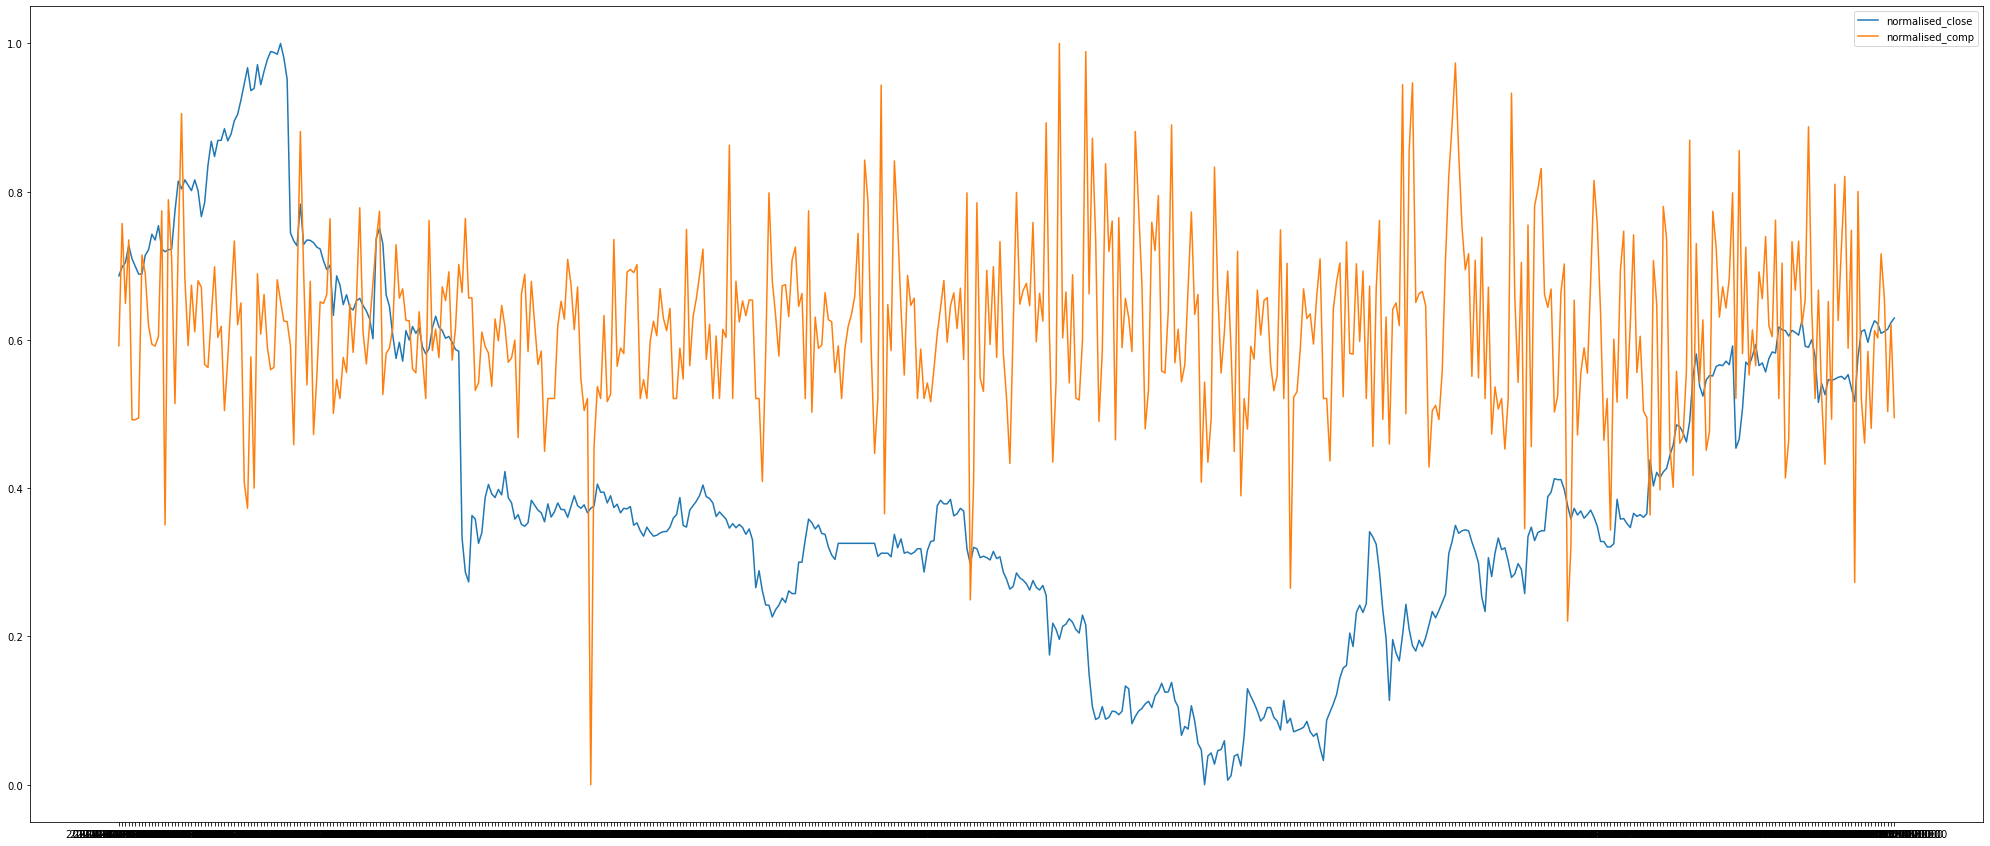

In [9]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(result.index,result['normalised_close'], label = "normalised_close")
plt.plot(result.index,result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()

In [10]:
first_80pct = round((result.shape[0]/100 * 80))
first_80pct

431

In [11]:
#split into train test
train = result.iloc[:first_80pct]
test = result.iloc[first_80pct:]

In [12]:
train

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-21 09:30:00,36.209999,0.113150,0.686440,0.592308
2021-01-21 10:00:00,36.259998,0.374767,0.698547,0.757113
2021-01-21 10:30:00,36.285000,0.203680,0.704600,0.649338
2021-01-21 11:00:00,36.379101,0.339467,0.727385,0.734876
2021-01-21 11:30:00,36.305000,-0.045900,0.709443,0.492115
...,...,...,...,...
2021-03-10 09:00:00,34.439999,-0.278700,0.257869,0.345463
2021-03-10 09:30:00,34.757999,0.371600,0.334867,0.755118
2021-03-10 10:00:00,34.810001,-0.102900,0.347458,0.456208


In [13]:
test

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-03-10 11:30:00,34.790001,0.492700,0.342615,0.831405
2021-03-10 12:00:00,34.790001,0.223500,0.342615,0.661823
2021-03-10 12:30:00,34.980000,0.195315,0.388620,0.644068
2021-03-10 13:00:00,35.005001,0.234383,0.394673,0.668679
2021-03-10 13:30:00,35.080002,-0.028840,0.412833,0.502862
...,...,...,...,...
2021-03-22 13:00:00,35.889999,0.309813,0.608959,0.716195
2021-03-22 13:30:00,35.900002,0.212863,0.611380,0.655122
2021-03-22 14:00:00,35.913300,-0.028017,0.614600,0.503381


In [14]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([train.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
X_train = np.asarray(list_of_sentiments_score)

In [15]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([test.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
X_test = np.asarray(list_of_sentiments_score)

In [16]:
y_train = pd.DataFrame(train['Close'])
y_test = pd.DataFrame(test['Close'])

Random Forest

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
prediction= rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
prediction

array([33.74681469, 34.74191551, 34.86144932, 34.23986809, 35.12464966,
       34.76325554, 34.77876987, 34.7338588 , 34.53319946, 35.25199978,
       35.00118496, 35.78486038, 33.9274091 , 35.27402142, 34.04843929,
       36.51101776, 34.68825899, 34.90325737, 33.94409904, 34.12419128,
       34.6503564 , 35.24934978, 34.48977467, 34.90912479, 33.85312149,
       34.02810051, 34.6503564 , 35.35480305, 34.60112141, 35.58354492,
       35.12044712, 35.15566383, 35.47612404, 35.33430046, 34.50075066,
       35.71303951, 35.85534241, 35.02244507, 34.91232021, 34.78480221,
       36.41885227, 34.19836411, 34.67403652, 35.25746078, 34.23724911,
       34.28884235, 34.47870102, 35.52951008, 34.62613728, 35.07008617,
       34.57826244, 34.38301003, 36.01210846, 35.2910989 , 34.54729942,
       35.54674944, 34.7304015 , 36.5804393 , 34.5765461 , 34.6503564 ,
       34.43402393, 34.85829082, 34.96803867, 34.50128132, 34.84605027,
       34.73836926, 35.52183632, 34.91020107, 34.58295818, 35.78

In [19]:
idx = test.index
predictions_df = pd.DataFrame(data=test['Close'], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close'].apply(np.int64)
predictions_df['predicted_price'] = prediction
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
predictions_df.columns = ['Close', 'predicted_price']

In [22]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Random Forest RMSE:",rmse)

Random Forest RMSE: 0.9148772031511921


In [23]:
predictions_df

,Close,predicted_price
Datetime,,
2021-03-10 11:30:00,34,33
2021-03-10 12:00:00,34,34
2021-03-10 12:30:00,34,34
2021-03-10 13:00:00,35,34
2021-03-10 13:30:00,35,35
...,...,...
2021-03-22 13:00:00,35,34
2021-03-22 13:30:00,35,34
2021-03-22 14:00:00,35,35


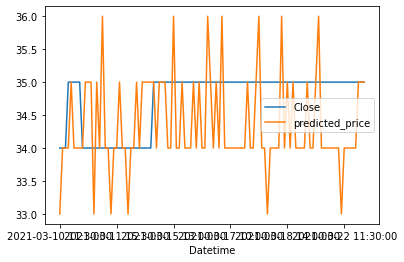

In [24]:
predictions_df.plot()

Linear Regression

In [25]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction= regr.predict(X_test)

In [26]:
prediction

array([[34.90580063],
       [34.92450828],
       [34.92646692],
       [34.92375195],
       [34.94204426],
       [34.93962172],
       [34.92411425],
       [34.92002479],
       [34.97316762],
       [34.96221081],
       [34.92539432],
       [34.94547273],
       [34.93623919],
       [34.93250217],
       [34.93627613],
       [34.92237869],
       [34.90758615],
       [34.9141732 ],
       [34.92741211],
       [34.94625356],
       [34.94004007],
       [34.95961986],
       [34.93120861],
       [34.94057749],
       [34.92107182],
       [34.91513824],
       [34.94004007],
       [34.92899755],
       [34.91567764],
       [34.93617822],
       [34.93076964],
       [34.94192732],
       [34.94286429],
       [34.9573787 ],
       [34.91950011],
       [34.92598154],
       [34.95362837],
       [34.91144697],
       [34.91635843],
       [34.94737936],
       [34.95325426],
       [34.93600143],
       [34.94670152],
       [34.94569128],
       [34.93599654],
       [34

In [27]:
idx = test.index
predictions_df = pd.DataFrame(data=test['Close'], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close'].apply(np.int64)
predictions_df['predicted_price'] = prediction
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
predictions_df.columns = ['Close', 'predicted_price']

In [28]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Linear Regression RMSE:",rmse)

Linear Regression RMSE: 0.6397605016869233


In [29]:
predictions_df

,Close,predicted_price
Datetime,,
2021-03-10 11:30:00,34,34
2021-03-10 12:00:00,34,34
2021-03-10 12:30:00,34,34
2021-03-10 13:00:00,35,34
2021-03-10 13:30:00,35,34
...,...,...
2021-03-22 13:00:00,35,34
2021-03-22 13:30:00,35,34
2021-03-22 14:00:00,35,34


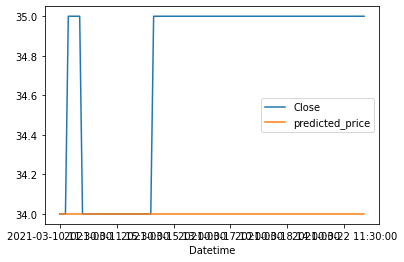

In [30]:
predictions_df.plot()

Adaboost Regressor

In [31]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
prediction= regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
prediction

array([34.89273323, 35.14551184, 35.14551184, 35.14551184, 34.89129497,
       34.89129497, 35.14551184, 35.14551184, 34.99271287, 35.37285778,
       35.14551184, 34.89129497, 34.72645994, 35.36184093, 34.72645994,
       35.14551184, 34.89273323, 34.90142977, 35.14551184, 34.89129497,
       34.89129497, 35.37285778, 35.36184093, 34.89129497, 35.14551184,
       34.90142977, 34.89129497, 35.36184093, 34.90142977, 35.26948156,
       35.36184093, 34.89129497, 34.89129497, 34.67978287, 35.14551184,
       35.34367269, 35.37285778, 34.90142977, 34.90142977, 34.89129497,
       35.37285778, 35.26948156, 34.89129497, 34.89129497, 35.26948156,
       34.89273323, 34.89129497, 35.14551184, 34.89129497, 35.32116123,
       34.89129497, 34.89129497, 34.90142977, 35.14551184, 35.14551184,
       35.14551184, 35.14551184, 35.14551184, 34.89273323, 34.89129497,
       34.89273323, 35.36184093, 35.14551184, 34.72645994, 35.36184093,
       35.36184093, 35.14551184, 35.14551184, 34.90142977, 35.36

In [33]:
idx = test.index
predictions_df = pd.DataFrame(data=test['Close'], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close'].apply(np.int64)
predictions_df['predicted_price'] = prediction
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
predictions_df.columns = ['Close', 'predicted_price']

In [34]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Adaboost RMSE:",rmse)

Adaboost RMSE: 0.567956483147795


In [35]:
predictions_df

,Close,predicted_price
Datetime,,
2021-03-10 11:30:00,34,34
2021-03-10 12:00:00,34,35
2021-03-10 12:30:00,34,35
2021-03-10 13:00:00,35,35
2021-03-10 13:30:00,35,34
...,...,...
2021-03-22 13:00:00,35,35
2021-03-22 13:30:00,35,35
2021-03-22 14:00:00,35,34


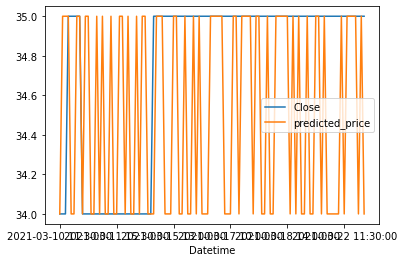

In [36]:
predictions_df.plot()

Basic machine learning regressors are not suitable in predicting stock prices. Hence, we will try deep learning